<a href="https://colab.research.google.com/github/somkiatth/git/blob/master/TUCopy_of_Name_EDA_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library




In [3]:
# import package library
import numpy as np
import pandas as pd
# some imports to set up plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

## Dealing with missing values

Import data from temporary storage:

In [4]:
df = pd.read_csv('Operations_empty.csv')
df.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
1,10001,Company,Cash,NaN,651750.0,1043,Japan,Asia
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,NaN,1024,Argentina,America


### Drop NA

In [14]:
# count NAN in each column



In [15]:
# drop na

In [18]:
# ลบแถวของข้อมูลที่มีค่า NaN ในคอลัมน์ 'Purchases'
df.dropna(subset = ['Purchases'], axis = 0, inplace = True)
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,NaN,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


### Replace NA with Mean

In [27]:
# find mean of 'Sales'
sales_mean =df['Sales'].mean()

In [28]:
sales_mean

553509.8235294118

In [29]:
# แทนค่าข้อมูลที่มีค่า NaN ด้วยค่าเฉลี่ยของ Sales ในคอลัมน์ Sales
df_testfill = df.copy()
df['Sales'].fillna(value = int(df['Sales'].mean()), inplace=True)
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


In [30]:
# นับค่า NaN ของ df_testfill

In [31]:
sales_mean = df['Sales'].mean()
df['Sales'] = df['Sales'].replace(np.nan, int(sales_mean))
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


In [32]:
df.isna().sum()

Customer         0
Customer Type    0
Payment Type     0
Purchases        0
Sales            0
Refunds          0
Country          0
Continent        0
dtype: int64

## Dealing with duplicate data

In [33]:
# Construct new data frame from dictionary, data_df
data_df  = {'Name': ['Arpit', 'Riya', 'Priyanka', 'Aman', 'Arpit', 'Rohan', 'Riya', 'Sakshi'],

           'Employment Type': ['Full-time Employee', 'Part-time Employee', 'Intern', 'Intern',
                               'Full-time Employee', 'Part-time Employee', 'Part-time Employee', 'Full-time Employee'],

           'Department': ['Administration', 'Marketing', 'Technical', 'Marketing',
                          'Administration', 'Technical', 'Marketing', 'Administration']}

# data_df

df_emp = pd.DataFrame(data_df)
df_emp

,Name,Employment Type,Department
0,Arpit,Full-time Employee,Administration
1,Riya,Part-time Employee,Marketing
2,Priyanka,Intern,Technical
3,Aman,Intern,Marketing
4,Arpit,Full-time Employee,Administration
5,Rohan,Part-time Employee,Technical
6,Riya,Part-time Employee,Marketing
7,Sakshi,Full-time Employee,Administration


In [34]:
#นับจำนวนข้อมูลที่มีค่าซ้ำ

### Drop duplicate keep first

In [35]:
bool_series = df_emp.duplicated()
bool_series

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7    False
dtype: bool

In [37]:
df_emp[~bool_series]

,Name,Employment Type,Department
0,Arpit,Full-time Employee,Administration
1,Riya,Part-time Employee,Marketing
2,Priyanka,Intern,Technical
3,Aman,Intern,Marketing
5,Rohan,Part-time Employee,Technical
7,Sakshi,Full-time Employee,Administration


## Data Formatting

In [38]:
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


In [87]:
#สร้าง column ใหม่
df['Purchases in thousands'] =
df['Sales in thousands'] =
df['Refunds in thousands'] =
df

SyntaxError: ignored

In [42]:
#ตรวจสอบชนิดข้อมูลในแต่ละคอลัมน์
df.dtypes

Customer           int64
Customer Type     object
Payment Type      object
Purchases        float64
Sales            float64
Refunds            int64
Country           object
Continent         object
dtype: object

In [43]:
#เปลี่ยนชนิดข้อมูล
df = df.astype({'Customer': object})

In [44]:
#ลองเช็คชนิดข้อมูลในแต่ละคอลัมน์อีกรอบ
df.dtypes

Customer          object
Customer Type     object
Payment Type      object
Purchases        float64
Sales            float64
Refunds            int64
Country           object
Continent         object
dtype: object

## Data Scaling

In [45]:
df_employee = pd.read_csv('Employees.csv')
df_employee

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,23,1,500,Single,Elementary
1,2,1000002,Peter,Hank,30,3,900,Married,High School
2,3,1000003,Jack,Sullivan,27,2,900,Married,High School
3,4,1000004,Marco,Aurelio,40,8,1500,Married,Master Degree
4,5,1000005,Claudia,Perez,35,5,1300,Single,Master Degree
5,6,1000006,Sally,Royal,19,1,1400,Single,Graduate
6,7,1000007,Peter,Miller,33,4,600,Married,Graduate
7,8,1000008,Susan,Gordon,35,10,2000,Married,Master Degree


### Simple Feature Scaling

In [49]:
df_norm1 = df_employee.copy()
df_norm1

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,23,1,500,Single,Elementary
1,2,1000002,Peter,Hank,30,3,900,Married,High School
2,3,1000003,Jack,Sullivan,27,2,900,Married,High School
3,4,1000004,Marco,Aurelio,40,8,1500,Married,Master Degree
4,5,1000005,Claudia,Perez,35,5,1300,Single,Master Degree
5,6,1000006,Sally,Royal,19,1,1400,Single,Graduate
6,7,1000007,Peter,Miller,33,4,600,Married,Graduate
7,8,1000008,Susan,Gordon,35,10,2000,Married,Master Degree


In [51]:
df_norm1['Age'].max()

40

In [52]:
df_norm1['Age'] = df_norm1['Age']/df_norm1['Age'].max()
df_norm1['Salary'] = df_norm1['Salary']/df_norm1['Salary'].max()
df_norm1

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,0.575,1,0.25,Single,Elementary
1,2,1000002,Peter,Hank,0.750,3,0.45,Married,High School
2,3,1000003,Jack,Sullivan,0.675,2,0.45,Married,High School
3,4,1000004,Marco,Aurelio,1.000,8,0.75,Married,Master Degree
4,5,1000005,Claudia,Perez,0.875,5,0.65,Single,Master Degree
5,6,1000006,Sally,Royal,0.475,1,0.70,Single,Graduate
6,7,1000007,Peter,Miller,0.825,4,0.30,Married,Graduate
7,8,1000008,Susan,Gordon,0.875,10,1.00,Married,Master Degree


### Min-Max scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
df_norm2 = df_employee.copy()

In [55]:
scaler = MinMaxScaler()
df_norm2[['Age', 'Salary']] = scaler.fit_transform(df_norm2[['Age', 'Salary']])
df_norm2

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,0.190476,1,0.000000,Single,Elementary
1,2,1000002,Peter,Hank,0.523810,3,0.266667,Married,High School
2,3,1000003,Jack,Sullivan,0.380952,2,0.266667,Married,High School
3,4,1000004,Marco,Aurelio,1.000000,8,0.666667,Married,Master Degree
4,5,1000005,Claudia,Perez,0.761905,5,0.533333,Single,Master Degree
5,6,1000006,Sally,Royal,0.000000,1,0.600000,Single,Graduate
6,7,1000007,Peter,Miller,0.666667,4,0.066667,Married,Graduate
7,8,1000008,Susan,Gordon,0.761905,10,1.000000,Married,Master Degree


### Standard Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
df_norm3 = df_employee.copy()

In [58]:
scaler = StandardScaler()
df_norm3[['Age', 'Salary']] = scaler.fit_transform(df_norm3[['Age', 'Salary']])
df_norm3

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,-1.116211,1,-1.351972,Single,Elementary
1,2,1000002,Peter,Hank,-0.038490,3,-0.503676,Married,High School
2,3,1000003,Jack,Sullivan,-0.500370,2,-0.503676,Married,High School
3,4,1000004,Marco,Aurelio,1.501111,8,0.768768,Married,Master Degree
4,5,1000005,Claudia,Perez,0.731310,5,0.344620,Single,Master Degree
5,6,1000006,Sally,Royal,-1.732051,1,0.556694,Single,Graduate
6,7,1000007,Peter,Miller,0.423390,4,-1.139898,Married,Graduate
7,8,1000008,Susan,Gordon,0.731310,10,1.829139,Married,Master Degree


## Grouping Numerical Value into Classes

In [59]:
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


In [60]:
df.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America


In [65]:
my_class = np.linspace(start=min(df['Sales']), stop=max(df['Sales']), num=4)

In [66]:
my_class

array([103750.        , 377916.66666667, 652083.33333333, 926250.        ])

In [67]:
group_names = ["Low", "Medium", "High"]

In [68]:
df['Group Sales'] = pd.cut(df['Sales'], my_class, labels=group_names, include_lowest=True)

In [69]:
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Group Sales
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,Low
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,Medium
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,High
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,Medium
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,Medium
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America,High
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America,High
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America,High
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America,Low
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America,Medium


## Converting a categorical variable to numeric.

In [70]:
df.head(3)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Group Sales
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,Low
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,Medium
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,High


In [71]:
df['Payment Type'].unique()

array(['Cash', 'Credit Card', 'Transfer'], dtype=object)

In [72]:
df_dummies = pd.get_dummies(df['Payment Type'])

In [73]:
df_dummies

,Cash,Credit Card,Transfer
0,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,1,0,0
8,1,0,0
9,1,0,0
10,1,0,0


In [74]:
pd.concat([df, df_dummies], axis=1)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Group Sales,Cash,Credit Card,Transfer
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,Low,1,0,0
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,Medium,0,1,0
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,High,0,0,1
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,Medium,0,0,1
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,Medium,0,0,1
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America,High,0,1,0
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America,High,1,0,0
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America,High,1,0,0
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America,Low,1,0,0
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America,Medium,1,0,0


# EDA

## Univariate non-graphical EDA: Categorical Data

In [76]:
df_operations = pd.read_csv('Operations.csv')
df_operations.head(3)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America


## Univariate non-graphical EDA: Numerical Data

## Univariate Graphical EDA: Categorical Data

In [77]:
#สร้าง Bar plot ของ Payment Type

In [78]:
#สร้าง Bar plot ของ Continent

## Univariate Graphical EDA: Numerical Data

### Histogram

In [79]:
df_operations.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America
3,10003,Company,Transfer,565000,706250,1130,Spain,Europe
4,10004,Person,Transfer,512300,640375,1024,Argentina,America


<Axes: ylabel='Frequency'>

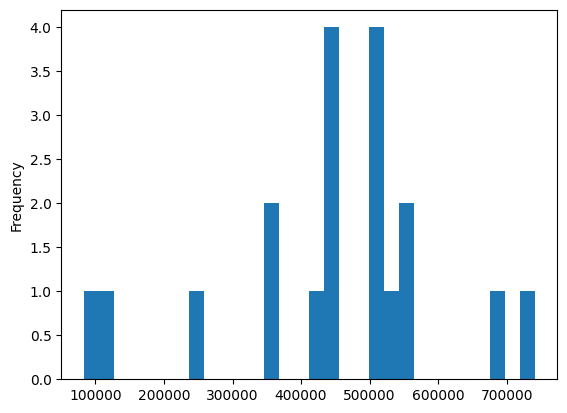

In [80]:
df_operations['Purchases'].plot.hist(bins=30)

### Boxplot

Text(0.5, 1.0, 'Box Plot')

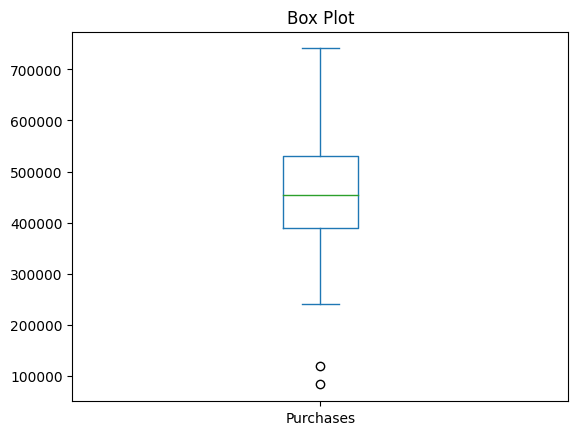

In [81]:
df_operations['Purchases'].plot(kind='box')
plt.title("Box Plot")

## Multivariate Graphical EDA

In [82]:
df_operations.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America
3,10003,Company,Transfer,565000,706250,1130,Spain,Europe
4,10004,Person,Transfer,512300,640375,1024,Argentina,America


### Scatter Plot

In [86]:
df_fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
df_fat.head(3)

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.053472,0.000938,0.004929,0.047605,38042000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,0.043597,0.001190,0.032820,0.009587,2858000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.023393,0.001629,0.015475,0.006289,43406000.0,%


In [84]:
df_fat.dtypes

NameError: ignored

In [85]:
df_fat.shape

NameError: ignored

In [ ]:
df_fat.isna().sum()

In [ ]:
df_fat = df_fat.dropna()

In [ ]:
df_fat.isna().sum()

In [ ]:
df_fat.plot.scatter(x='Animal fats', y='Animal Products')

In [ ]:
sns.lmplot(x='Vegetable Oils',y= 'Animal Products', data=df_fat)

### Correlation Analysis

In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_fat['Animal Products'], df_fat['Meat'])

In [ ]:
pearson_coef

In [ ]:
p_value

In [ ]:
if p_value < 0.001:
    print("High certainty")
elif p_value < 0.05:
    print("Moderate certainty")
elif p_value < 0.1:
    print("Low certainty")
else:
    print("Lack of certainty")

High certainty


In [ ]:
#หาค่า correlation ของ df_fat

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(c)

In [ ]:
#หาค่า correlation ของคอลัมน์ Obesity และ Animal Products ใน df_fat

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(c2, annot=True)

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
scatter_matrix(df_fat[['Animal Products', 'Meat', 'Obesity']])

### Cross Tab (Categorical)

In [ ]:
df_operations.head()

In [ ]:
cross_tab = pd.crosstab(index=df_operations['Country'], columns=df_operations['Payment Type'])

In [ ]:
cross_tab

In [ ]:
# Country Payment Type
cross_tab_prob = pd.crosstab(index=df_operations['Country'], columns=df_operations['Payment Type'], normalize="index")

In [ ]:
cross_tab_prob

In [ ]:
cross_tab_prob.plot(kind='bar', stacked=True)